In [110]:
from __future__ import print_function, division
from collections import defaultdict, OrderedDict
import gzip
import pickle
import json

import uproot
%matplotlib nbagg
import matplotlib.pyplot as plt
import numpy as np

from fnal_column_analysis_tools import hist, lookup_tools
from fnal_column_analysis_tools.hist import plot


In [5]:
with gzip.open("hists_reoptimization.pkl.gz") as fin:
    hists = pickle.load(fin)

In [6]:
process = hist.Cat("process", "Process", sorting='placement')
process_cats = ("dataset", "AK8Puppijet0_isHadronicV")
process_map = OrderedDict()
#process_map["QCD"] = ("QCD*", slice(None))
#process_map["QCDinV"] = ("Z*", 0)
process_map["Hcc"] = ("GluGluHToCC", 2)
process_map["Hbb"] = ("GluGluHToBB", 3)
process_map["Zqq"] = ("ZJetsToQQ_HT*", 1)
process_map["Zcc"] = ("ZJetsToQQ_HT*", 2)
process_map["Zbb"] = ("ZJetsToQQ_HT*", 3)
process_map["Wqq"] = ("WJetsToQQ_HT*", 1)
process_map["Wcs"] = ("WJetsToQQ_HT*", 2)
process_map["Top"] = ("TTTo*", slice(None))
process_map["QCD"] = ("QCD*", slice(None))


for key in hists.keys():
    hists[key] = hists[key].group(process, process_cats, process_map)

/uscms/home/separk/nobackup/coffea/fnal-column-analysis-tools/fnal_column_analysis_tools/hist/hist_tools.py:478: RuntimeWarning: Allocating a large (>10M bin) histogram!
  warnings.warn("Allocating a large (>10M bin) histogram!", RuntimeWarning)


In [7]:
x = hists['hjetpt']


In [8]:
print(x)

<Hist (process,AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7fd7cc8c2e10>


In [9]:
y = x.project("AK8Puppijet0_pt", slice(450,None), overflow='over')


In [10]:
print(y)


<Hist (process,jetrho,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7fd7cfa4a780>


In [11]:
z = y.sum("jetrho")


In [12]:
print(z)


<Hist (process,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7fd7cc5446d8>


In [13]:
print(z.sum("AK8Puppijet0_N2sdb1").values())


{('Hbb',): array([0.04442631, 0.07195245, 0.06914911, 0.06730691, 0.06455697,
       0.06463706, 0.06162014, 0.06348903, 0.06407639, 0.06442347,
       0.06423658, 0.06546471, 0.06762729, 0.07187236, 0.07350096,
       0.07803971, 0.08084305, 0.08554198, 0.09125546, 0.09857085,
       0.10564595, 0.11277445, 0.12513585, 0.13872539, 0.14988536,
       0.17025632, 0.19094765, 0.22093005, 0.2635676 , 0.31645733,
       0.39553824, 0.5126912 , 0.7031317 , 1.0772578 , 1.846468  ,
       3.082342  , 3.8553698 , 3.0644534 , 1.3659753 , 0.19006659],
      dtype=float32), ('QCD',): array([3.4228500e+05, 1.6998853e+05, 8.3768609e+04, 5.0899090e+04,
       3.4842562e+04, 2.5458727e+04, 1.9737492e+04, 1.5889106e+04,
       1.3120262e+04, 1.1095387e+04, 9.5109697e+03, 8.3882676e+03,
       7.4811465e+03, 6.6900308e+03, 6.0560703e+03, 5.5225425e+03,
       5.1057188e+03, 4.8127920e+03, 4.4787036e+03, 4.2658105e+03,
       4.0768223e+03, 3.8814348e+03, 3.8003665e+03, 3.6455513e+03,
       3.6307871e+

In [14]:
def multidim_cumsum(a):
    out = a[...,::-1].cumsum(1)[...,::-1]
    for i in range(2,a.ndim+1):
        np.cumsum(out, axis=-i, out=out)
    return out

In [15]:
a = np.array([[7, -1, 3], [1, -2, 4], [10, 1, 5]])

In [16]:
print(a)

[[ 7 -1  3]
 [ 1 -2  4]
 [10  1  5]]


In [17]:
multidim_cumsum(a)

array([[ 9,  2,  3],
       [12,  4,  7],
       [28, 10, 12]])

In [18]:
k = z.sum("AK8Puppijet0_N2sdb1").values()

In [19]:
print(k)

{('Hbb',): array([0.04442631, 0.07195245, 0.06914911, 0.06730691, 0.06455697,
       0.06463706, 0.06162014, 0.06348903, 0.06407639, 0.06442347,
       0.06423658, 0.06546471, 0.06762729, 0.07187236, 0.07350096,
       0.07803971, 0.08084305, 0.08554198, 0.09125546, 0.09857085,
       0.10564595, 0.11277445, 0.12513585, 0.13872539, 0.14988536,
       0.17025632, 0.19094765, 0.22093005, 0.2635676 , 0.31645733,
       0.39553824, 0.5126912 , 0.7031317 , 1.0772578 , 1.846468  ,
       3.082342  , 3.8553698 , 3.0644534 , 1.3659753 , 0.19006659],
      dtype=float32), ('QCD',): array([3.4228500e+05, 1.6998853e+05, 8.3768609e+04, 5.0899090e+04,
       3.4842562e+04, 2.5458727e+04, 1.9737492e+04, 1.5889106e+04,
       1.3120262e+04, 1.1095387e+04, 9.5109697e+03, 8.3882676e+03,
       7.4811465e+03, 6.6900308e+03, 6.0560703e+03, 5.5225425e+03,
       5.1057188e+03, 4.8127920e+03, 4.4787036e+03, 4.2658105e+03,
       4.0768223e+03, 3.8814348e+03, 3.8003665e+03, 3.6455513e+03,
       3.6307871e+

In [20]:
k[('QCD',)]

array([3.4228500e+05, 1.6998853e+05, 8.3768609e+04, 5.0899090e+04,
       3.4842562e+04, 2.5458727e+04, 1.9737492e+04, 1.5889106e+04,
       1.3120262e+04, 1.1095387e+04, 9.5109697e+03, 8.3882676e+03,
       7.4811465e+03, 6.6900308e+03, 6.0560703e+03, 5.5225425e+03,
       5.1057188e+03, 4.8127920e+03, 4.4787036e+03, 4.2658105e+03,
       4.0768223e+03, 3.8814348e+03, 3.8003665e+03, 3.6455513e+03,
       3.6307871e+03, 3.6130911e+03, 3.5520081e+03, 3.5816829e+03,
       3.5929619e+03, 3.6987493e+03, 3.7275552e+03, 3.8998284e+03,
       4.0792646e+03, 4.2716445e+03, 4.3970098e+03, 4.0602231e+03,
       2.9825571e+03, 1.5690505e+03, 5.1539722e+02, 7.0690361e+01],
      dtype=float32)

In [21]:
multidim_cumsum(k[('QCD',)])

AxisError: axis 1 is out of bounds for array of dimension 1

In [22]:
t = z.values(overflow='allnan')


In [23]:
print(t)

{('Hbb',): array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32), ('QCD',): array([[0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.01347783, ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.1526023 , 0.4287994 , ..., 0.07184455, 0.        ,
        0.        ],
       ...,
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ]], dtype=float32)}


In [24]:
multidim_cumsum(t[()])

KeyError: ()

In [25]:
background = multidim_cumsum(t[('QCD',)])

In [26]:
print(background)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [2.5156641e+00 2.5156641e+00 2.5156641e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.4566739e+01 1.4566739e+01 1.4414137e+01 ... 7.1844548e-02
  0.0000000e+00 0.0000000e+00]
 ...
 [8.9606531e+05 8.9606531e+05 5.5378031e+05 ... 9.2514381e+01
  2.1824034e+01 2.1824034e+01]
 [8.9606531e+05 8.9606531e+05 5.5378031e+05 ... 9.2514381e+01
  2.1824034e+01 2.1824034e+01]
 [8.9606531e+05 8.9606531e+05 5.5378031e+05 ... 9.2514381e+01
  2.1824034e+01 2.1824034e+01]]


In [27]:
signal = multidim_cumsum(t[('Hbb',)])

In [28]:
print(signal)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [8.0095488e-05 8.0095488e-05 8.0095488e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.9300478e+01 1.9300478e+01 1.9256054e+01 ... 1.9033356e-01
  2.6698498e-04 2.6698498e-04]
 [1.9300478e+01 1.9300478e+01 1.9256054e+01 ... 1.9033356e-01
  2.6698498e-04 2.6698498e-04]
 [1.9300478e+01 1.9300478e+01 1.9256054e+01 ... 1.9033356e-01
  2.6698498e-04 2.6698498e-04]]


In [29]:
print(a)

[[ 7 -1  3]
 [ 1 -2  4]
 [10  1  5]]


In [30]:
aa = multidim_cumsum(a)

In [31]:
print(aa)

[[ 9  2  3]
 [12  4  7]
 [28 10 12]]


In [32]:
print(np.sqrt(aa))

[[3.         1.41421356 1.73205081]
 [3.46410162 2.         2.64575131]
 [5.29150262 3.16227766 3.46410162]]


In [33]:
sqrtbkg = np.sqrt(background)

In [34]:
print(sqrtbkg)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.5860845e+00 1.5860845e+00 1.5860845e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [3.8166397e+00 3.8166397e+00 3.7965953e+00 ... 2.6803833e-01
  0.0000000e+00 0.0000000e+00]
 ...
 [9.4660724e+02 9.4660724e+02 7.4416418e+02 ... 9.6184397e+00
  4.6716199e+00 4.6716199e+00]
 [9.4660724e+02 9.4660724e+02 7.4416418e+02 ... 9.6184397e+00
  4.6716199e+00 4.6716199e+00]
 [9.4660724e+02 9.4660724e+02 7.4416418e+02 ... 9.6184397e+00
  4.6716199e+00 4.6716199e+00]]


In [35]:
print(aa)

[[ 9  2  3]
 [12  4  7]
 [28 10 12]]


In [36]:
print(aa+1)

[[10  3  4]
 [13  5  8]
 [29 11 13]]


In [37]:
print((aa+1)/aa)

[[1.11111111 1.5        1.33333333]
 [1.08333333 1.25       1.14285714]
 [1.03571429 1.1        1.08333333]]


In [38]:
soverb = signal/(sqrtbkg+1)

In [39]:
print(soverb)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.6628914e-05 1.6628914e-05 1.6698403e-05 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [2.0367593e-02 2.0367593e-02 2.5841357e-02 ... 1.7924814e-02
  4.7073849e-05 4.7073849e-05]
 [2.0367593e-02 2.0367593e-02 2.5841357e-02 ... 1.7924814e-02
  4.7073849e-05 4.7073849e-05]
 [2.0367593e-02 2.0367593e-02 2.5841357e-02 ... 1.7924814e-02
  4.7073849e-05 4.7073849e-05]]


In [40]:
print(np.amax(aa))

28


In [41]:
print(np.amax(soverb))

0.1288894


In [42]:
print(np.argmax(aa))

6


In [43]:
print(aa.8)

SyntaxError: invalid syntax (<ipython-input-43-5256b4a29449>, line 1)

In [69]:
print(aa/8)

[[0.125 0.25  0.25 ]
 [0.25  0.5   0.625]
 [0.375 0.75  1.   ]]


In [70]:
print(aa/np.amax(aa))

[[0.125 0.25  0.25 ]
 [0.25  0.5   0.625]
 [0.375 0.75  1.   ]]


In [71]:
print(aa/np.argmax(aa))

[[0.125 0.25  0.25 ]
 [0.25  0.5   0.625]
 [0.375 0.75  1.   ]]


In [44]:
print(soverb/np.amax(soverb))

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.2901693e-04 1.2901693e-04 1.2955607e-04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.5802380e-01 1.5802380e-01 2.0049250e-01 ... 1.3907129e-01
  3.6522670e-04 3.6522670e-04]
 [1.5802380e-01 1.5802380e-01 2.0049250e-01 ... 1.3907129e-01
  3.6522670e-04 3.6522670e-04]
 [1.5802380e-01 1.5802380e-01 2.0049250e-01 ... 1.3907129e-01
  3.6522670e-04 3.6522670e-04]]


In [45]:
norm_soverb = soverb/np.amax(soverb)

In [46]:
print(norm_soverb)

[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 [1.2901693e-04 1.2901693e-04 1.2955607e-04 ... 0.0000000e+00
  0.0000000e+00 0.0000000e+00]
 ...
 [1.5802380e-01 1.5802380e-01 2.0049250e-01 ... 1.3907129e-01
  3.6522670e-04 3.6522670e-04]
 [1.5802380e-01 1.5802380e-01 2.0049250e-01 ... 1.3907129e-01
  3.6522670e-04 3.6522670e-04]
 [1.5802380e-01 1.5802380e-01 2.0049250e-01 ... 1.3907129e-01
  3.6522670e-04 3.6522670e-04]]


In [47]:
print(np.argmax(soverb))

638


<IPython.core.display.Javascript object>


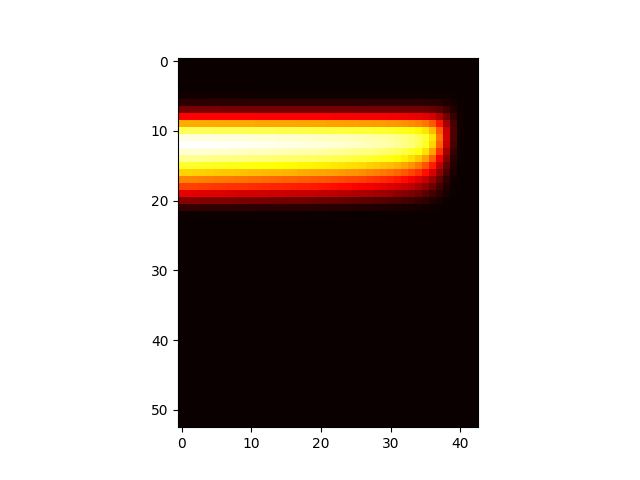

In [59]:
plt.imshow(signal, cmap='hot', interpolation='nearest')

In [1]:
print(np.amax(norm_soverb))

NameError: name 'np' is not defined

In [91]:
ptbins = np.searchsorted(norm_soverb[:,3], 1.0)

In [93]:
print(np.unravel_index(norm_soverb.argmax(), norm_soverb.shape))

(12, 39)


In [94]:
plt.imshow(sqrtbkg, cmap='hot', interpolation='nearest')

In [48]:
htemp = z.project("process")

In [49]:
htemp.clear()

In [50]:
htemp.label = '$S/\sqrt{B}$'

In [51]:
htemp._sumw = {():norm_soverb}

<IPython.core.display.Javascript object>


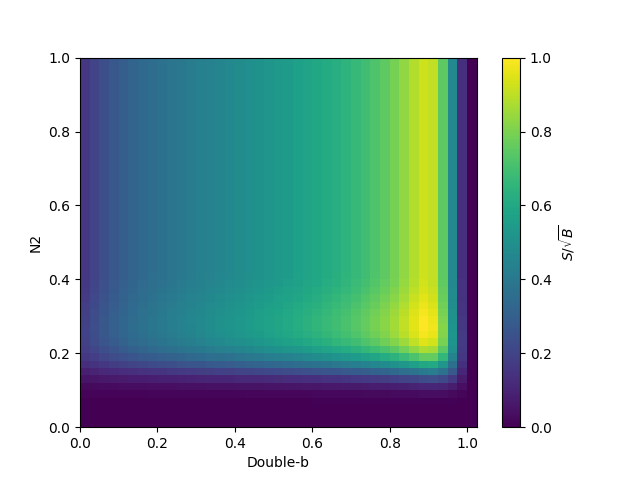

In [52]:
fig, ax, _ = plot.plot2d(htemp, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

In [121]:
fig.savefig("plots/reoptimize.pdf")


<Hist (AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7fb064d0f668>

In [67]:
print(x)

<Hist (process,AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1,AK8Puppijet0_deepdoubleb) instance at 0x7fb09043fbe0>


In [17]:
print(x_Hbb)

<Hist (process,AK8Puppijet0_pt,AK8Puppijet0_N2sdb1,jetrho,AK8Puppijet0_deepdoubleb) instance at 0x7fb09043fcc0>


In [54]:
histo = x.sum("AK8Puppijet0_deepdoubleb")
print(histo)

<Hist (process,AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7fd7cc0810b8>


In [55]:
print(histo.sum("process"))

<Hist (AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7fd7cc081198>


In [56]:
val_QCD = histo.values(overflow='allnan')[('QCD',)]
val_HBB = histo.values(overflow='allnan')[('Hbb',)]
print(val_QCD)
print(val_HBB)

[[[0.00000000e+00 8.30228188e+05 4.04568984e+04 ... 0.00000000e+00
   0.00000000e+00 1.99678547e+05]
  [0.00000000e+00 8.86049461e+00 9.14822292e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 5.29477406e+00 8.64741516e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 5.71461737e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.85730863e+00 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 8.29022408e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 8.86296094e+04]]

 [[0.00000000e+00 1.49011279e+04 7.60677307e+02 ... 0.00000000e+00
   0.00000000e+00 3.78577100e+03]
  [0.00000000e+00 0.00000000e+00 1.43268317e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  [0.00000000e+00 0.00000000e+00 1.43268317e-01 ... 0.00000000e+00
   0.00000000e+00 0.00000000e+00]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000

In [57]:
np.cumsum(val_QCD, axis=2)

array([[[0.00000000e+00, 8.30228188e+05, 8.70685062e+05, ...,
         1.43737440e+07, 1.43737440e+07, 1.45734230e+07],
        [0.00000000e+00, 8.86049461e+00, 1.80087166e+01, ...,
         1.99104734e+05, 1.99104734e+05, 1.99104734e+05],
        [0.00000000e+00, 5.29477406e+00, 1.39421892e+01, ...,
         1.99758125e+05, 1.99758125e+05, 1.99758125e+05],
        ...,
        [0.00000000e+00, 0.00000000e+00, 5.71461737e-01, ...,
         3.11592438e+05, 3.11592438e+05, 3.11592438e+05],
        [0.00000000e+00, 0.00000000e+00, 2.85730863e+00, ...,
         1.42756288e+06, 1.42756288e+06, 1.42756288e+06],
        [0.00000000e+00, 8.29022408e+00, 8.29022408e+00, ...,
         8.29022408e+00, 8.29022408e+00, 8.86378984e+04]],

       [[0.00000000e+00, 1.49011279e+04, 1.56618057e+04, ...,
         2.13752203e+05, 2.13752203e+05, 2.17537969e+05],
        [0.00000000e+00, 0.00000000e+00, 1.43268317e-01, ...,
         2.24353784e+03, 2.24353784e+03, 2.24353784e+03],
        [0.00000000e+00, 

In [58]:
print(a)

[[ 7 -1  3]
 [ 1 -2  4]
 [10  1  5]]


In [59]:
numpy.cumsum(a)

NameError: name 'numpy' is not defined

In [5]:
np.cumsum(a)

array([ 7,  6,  9, 10,  8, 12, 22, 23, 28])

In [60]:
np.cumsum(a,axis=0)

array([[ 7, -1,  3],
       [ 8, -3,  7],
       [18, -2, 12]])

In [61]:
np.cumsum(a,axis=1)

array([[ 7,  6,  9],
       [ 1, -1,  3],
       [10, 11, 16]])

In [8]:
testing = np.cumsum(a,axis=1)

In [9]:
print(testing)

[[ 7  6  9]
 [ 1 -1  3]
 [10 11 16]]


In [10]:
testing[:-1]

array([[ 7,  6,  9],
       [ 1, -1,  3]])

In [11]:
testing[:,-1]

array([ 9,  3, 16])

In [12]:
testing/testing[:,-1]

array([[ 0.77777778,  2.        ,  0.5625    ],
       [ 0.11111111, -0.33333333,  0.1875    ],
       [ 1.11111111,  3.66666667,  1.        ]])

In [13]:
testing[np.newaxis,:]

array([[[ 7,  6,  9],
        [ 1, -1,  3],
        [10, 11, 16]]])

In [14]:
testing2 = testing[:,-1]

In [15]:
print(testing2)

[ 9  3 16]


In [16]:
testing2[np.newaxis,:]

array([[ 9,  3, 16]])

In [17]:
testing3 = testing2[np.newaxis,:]

In [18]:
print(testing3)

[[ 9  3 16]]


In [19]:
testing/testing3

array([[ 0.77777778,  2.        ,  0.5625    ],
       [ 0.11111111, -0.33333333,  0.1875    ],
       [ 1.11111111,  3.66666667,  1.        ]])

In [20]:
testing4 = testing2[:,np.newaxis]

In [21]:
print(testing4)

[[ 9]
 [ 3]
 [16]]


In [22]:
testing/testing4

array([[ 0.77777778,  0.66666667,  1.        ],
       [ 0.33333333, -0.33333333,  1.        ],
       [ 0.625     ,  0.6875    ,  1.        ]])

In [62]:
np.cumsum(val_QCD, axis=2)

array([[[0.00000000e+00, 8.30228188e+05, 8.70685062e+05, ...,
         1.43737440e+07, 1.43737440e+07, 1.45734230e+07],
        [0.00000000e+00, 8.86049461e+00, 1.80087166e+01, ...,
         1.99104734e+05, 1.99104734e+05, 1.99104734e+05],
        [0.00000000e+00, 5.29477406e+00, 1.39421892e+01, ...,
         1.99758125e+05, 1.99758125e+05, 1.99758125e+05],
        ...,
        [0.00000000e+00, 0.00000000e+00, 5.71461737e-01, ...,
         3.11592438e+05, 3.11592438e+05, 3.11592438e+05],
        [0.00000000e+00, 0.00000000e+00, 2.85730863e+00, ...,
         1.42756288e+06, 1.42756288e+06, 1.42756288e+06],
        [0.00000000e+00, 8.29022408e+00, 8.29022408e+00, ...,
         8.29022408e+00, 8.29022408e+00, 8.86378984e+04]],

       [[0.00000000e+00, 1.49011279e+04, 1.56618057e+04, ...,
         2.13752203e+05, 2.13752203e+05, 2.17537969e+05],
        [0.00000000e+00, 0.00000000e+00, 1.43268317e-01, ...,
         2.24353784e+03, 2.24353784e+03, 2.24353784e+03],
        [0.00000000e+00, 

In [63]:
qcd_maxval_temp = np.cumsum(val_QCD, axis=2)
hbb_maxval_temp = np.cumsum(val_HBB, axis=2)

In [64]:
print(hbb_maxval_temp)

[[[0.00000000e+00 1.08430600e+00 1.17924583e+00 ... 3.91827126e+01
   3.91827126e+01 3.94907074e+01]
  [0.00000000e+00 0.00000000e+00 2.66984971e-05 ... 3.51672620e-01
   3.51672620e-01 3.51672620e-01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.56958896e-01
   3.56958896e-01 3.56958896e-01]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.63646078e+00
   4.63646078e+00 4.63646078e+00]
  [0.00000000e+00 0.00000000e+00 5.33969942e-05 ... 2.64535122e+01
   2.64535122e+01 2.64535122e+01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 1.95406303e-01]]

 [[0.00000000e+00 2.20796578e-02 2.39485521e-02 ... 6.04961276e-01
   6.04961276e-01 6.09953880e-01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.67223721e-03
   4.67223721e-03 4.67223721e-03]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.51204553e-03
   4.51204553e-03 4.51204553e-03]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.28579944e-01
   1.28579

In [65]:
qcd_maxval_temp[:,:,-1]

array([[1.4573423e+07, 1.9910473e+05, 1.9975812e+05, ..., 3.1159244e+05,
        1.4275629e+06, 8.8637898e+04],
       [2.1753797e+05, 2.2435378e+03, 2.2919128e+03, ..., 3.3147163e+03,
        1.3325956e+04, 1.7025583e+03],
       [1.9147805e+05, 1.9343921e+03, 2.0167069e+03, ..., 2.8230691e+03,
        1.1287948e+04, 1.5308831e+03],
       ...,
       [1.2299843e+03, 1.1681630e+01, 1.1232394e+01, ..., 7.4489579e+00,
        2.9410975e+01, 1.2937772e+01],
       [2.0999467e+04, 1.8507384e+02, 1.8350937e+02, ..., 1.0053814e+02,
        3.9809637e+02, 2.2006709e+02],
       [0.0000000e+00, 0.0000000e+00, 0.0000000e+00, ..., 0.0000000e+00,
        0.0000000e+00, 0.0000000e+00]], dtype=float32)

In [66]:
qcd_maxval = qcd_maxval_temp[:,:,-1]
hbb_maxval = hbb_maxval_temp[:,:,-1]

In [67]:
norma = qcd_maxval_temp / np.maximum(1,qcd_maxval[:,:,np.newaxis])
norma2 = hbb_maxval_temp / np.maximum(1,hbb_maxval[:,:,np.newaxis])
print(norma2)

[[[0.00000000e+00 2.74572447e-02 2.98613496e-02 ... 9.92200851e-01
   9.92200851e-01 1.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.66984971e-05 ... 3.51672620e-01
   3.51672620e-01 3.51672620e-01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 3.56958896e-01
   3.56958896e-01 3.56958896e-01]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  [0.00000000e+00 0.00000000e+00 2.01852185e-06 ... 1.00000000e+00
   1.00000000e+00 1.00000000e+00]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 0.00000000e+00
   0.00000000e+00 1.95406303e-01]]

 [[0.00000000e+00 2.20796578e-02 2.39485521e-02 ... 6.04961276e-01
   6.04961276e-01 6.09953880e-01]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.67223721e-03
   4.67223721e-03 4.67223721e-03]
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 4.51204553e-03
   4.51204553e-03 4.51204553e-03]
  ...
  [0.00000000e+00 0.00000000e+00 0.00000000e+00 ... 1.28579944e-01
   1.28579

In [75]:
print(y_HBB)
print(norma2)

NameError: name 'y_HBB' is not defined

In [125]:
hist_y_QCD = histo.sum("process")
hist_y_HBB = histo.sum("process")

In [126]:
print(hist_y_HBB)
print(hist_y_QCD)

<Hist (AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7fd7cc0d10b8>
<Hist (AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7fd7cc0d1b00>


In [127]:
hist_y_QCD.clear()
hist_y_HBB.clear()

In [128]:
hist_y_QCD._sumw = {():norma}
hist_y_HBB._sumw = {():norma2}


In [94]:
with gzip.open("n2quantile_QCD.pkl.gz", "wb") as fout:
    pickle.dump(hist_y_QCD, fout, protocol=2)  # for python2 compatibility


In [95]:
with gzip.open("n2quantile_HBB.pkl.gz", "wb") as fout:
    pickle.dump(hist_y_HBB, fout, protocol=2)

In [129]:
print(hist_y_HBB)

<Hist (AK8Puppijet0_pt,jetrho,AK8Puppijet0_N2sdb1) instance at 0x7fd7cc0d10b8>


<IPython.core.display.Javascript object>


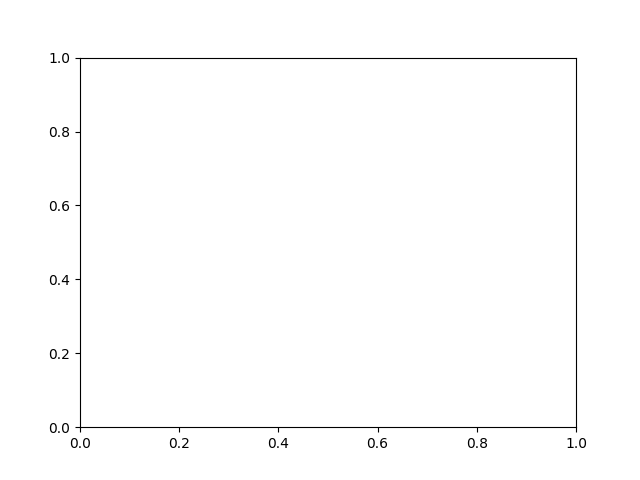

ValueError: plot2d() can only support exactly two dimensions

In [130]:
fig3, ax3, _ = plot.plot2d(hist_y_HBB, xaxis="AK8Puppijet0_deepdoubleb", xoverflow='over', patch_opts={})

In [79]:
print(bins)

(array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
        490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
        580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,
        670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,
        760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,
        850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,
        940.,  950.,  960.,  970.,  980.,  990., 1000.]), array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
       -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
       -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
       -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
       -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
       -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
       -2.4  , -2.325, -2.25 , -2.175, -2.1  ]), array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.1

In [80]:
bins = bins[::-1]

In [81]:
print(bins)

(array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]), array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
       -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
       -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
       -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
       -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
       -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
       -2.4  , -2.325, -2.25 , -2.175, -2.1  ]), array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
        490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
        580.,  590.,  600.,  610.,  620.,

In [82]:
bins = bins[::-1]

In [83]:
print(bins)

(array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
        490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
        580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,
        670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,
        760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,
        850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,
        940.,  950.,  960.,  970.,  980.,  990., 1000.]), array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
       -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
       -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
       -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
       -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
       -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
       -2.4  , -2.325, -2.25 , -2.175, -2.1  ]), array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.1

In [84]:
bins = bins[:,:,::-1]

TypeError: tuple indices must be integers or slices, not tuple

In [85]:
np.flip(bins,1)

ValueError: axis=1 is invalid for the 1-dimensional input array

In [86]:
np.flip(bins,0)

array([array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.12, 0.14, 0.16, 0.18, 0.2 ,
       0.22, 0.24, 0.26, 0.28, 0.3 , 0.32, 0.34, 0.36, 0.38, 0.4 , 0.42,
       0.44, 0.46, 0.48, 0.5 , 0.52, 0.54, 0.56, 0.58, 0.6 , 0.62, 0.64,
       0.66, 0.68, 0.7 , 0.72, 0.74, 0.76, 0.78, 0.8 , 0.82, 0.84, 0.86,
       0.88, 0.9 , 0.92, 0.94, 0.96, 0.98, 1.  ]),
       array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
       -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
       -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
       -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
       -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
       -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
       -2.4  , -2.325, -2.25 , -2.175, -2.1  ]),
       array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
        490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
        580.,  590., 

In [87]:
np.flip(bins,1)

ValueError: axis=1 is invalid for the 1-dimensional input array

In [88]:
print(bins)

(array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
        490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
        580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,
        670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,
        760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,
        850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,
        940.,  950.,  960.,  970.,  980.,  990., 1000.]), array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
       -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
       -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
       -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
       -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
       -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
       -2.4  , -2.325, -2.25 , -2.175, -2.1  ]), array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.1

In [89]:
bins = tuple(ax.edges() for ax in hist_y_HBB.axes())

In [90]:
print(hist_y_HBB.axes())

(<Bin (name=AK8Puppijet0_pt) instance at 0x7fd7cc8b2438>, <Bin (name=jetrho) instance at 0x7fd7cc8be278>, <Bin (name=AK8Puppijet0_N2sdb1) instance at 0x7fd7cc8beef0>)


In [91]:
print(hist_y_HBB.axes()[2])

<Bin (name=AK8Puppijet0_N2sdb1) instance at 0x7fd7cc8beef0>


In [92]:
bins[3]

IndexError: tuple index out of range

In [93]:
print(bins[2])

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


In [94]:
bins[2] = bins[2][::-1]

TypeError: 'tuple' object does not support item assignment

In [95]:
aaa = bins[2]

In [96]:
print(aaa)

[0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78 0.8  0.82
 0.84 0.86 0.88 0.9  0.92 0.94 0.96 0.98 1.  ]


In [97]:
aaa = aaa[::-1]

In [98]:
print(aaa)

[1.   0.98 0.96 0.94 0.92 0.9  0.88 0.86 0.84 0.82 0.8  0.78 0.76 0.74
 0.72 0.7  0.68 0.66 0.64 0.62 0.6  0.58 0.56 0.54 0.52 0.5  0.48 0.46
 0.44 0.42 0.4  0.38 0.36 0.34 0.32 0.3  0.28 0.26 0.24 0.22 0.2  0.18
 0.16 0.14 0.12 0.1  0.08 0.06 0.04 0.02 0.  ]


In [99]:
bins[2] = aaa

TypeError: 'tuple' object does not support item assignment

In [100]:
print(bins)

(array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
        490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
        580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,
        670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,
        760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,
        850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,
        940.,  950.,  960.,  970.,  980.,  990., 1000.]), array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
       -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
       -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
       -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
       -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
       -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
       -2.4  , -2.325, -2.25 , -2.175, -2.1  ]), array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.1

In [101]:
bins_list = list(bins)

In [102]:
list[2] = aaa

TypeError: 'type' object does not support item assignment

In [103]:
print(aaa)

[1.   0.98 0.96 0.94 0.92 0.9  0.88 0.86 0.84 0.82 0.8  0.78 0.76 0.74
 0.72 0.7  0.68 0.66 0.64 0.62 0.6  0.58 0.56 0.54 0.52 0.5  0.48 0.46
 0.44 0.42 0.4  0.38 0.36 0.34 0.32 0.3  0.28 0.26 0.24 0.22 0.2  0.18
 0.16 0.14 0.12 0.1  0.08 0.06 0.04 0.02 0.  ]


In [104]:
bins_list[2] =aaa

In [105]:
print(bins_list)

[array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
        490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
        580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,
        670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,
        760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,
        850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,
        940.,  950.,  960.,  970.,  980.,  990., 1000.]), array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
       -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
       -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
       -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
       -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
       -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
       -2.4  , -2.325, -2.25 , -2.175, -2.1  ]), array([1.  , 0.98, 0.96, 0.94, 0.92, 0.9 , 0.8

In [106]:
bins = tuple(bins_list)

In [107]:
print(bins)

(array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
        490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
        580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,
        670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,
        760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,
        850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,
        940.,  950.,  960.,  970.,  980.,  990., 1000.]), array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
       -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
       -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
       -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
       -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
       -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
       -2.4  , -2.325, -2.25 , -2.175, -2.1  ]), array([1.  , 0.98, 0.96, 0.94, 0.92, 0.9 , 0.8

In [108]:
n2q_array = hist_y_HBB.values()[()]


In [109]:
print(n2q_array)

[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.6722372e-03
   4.6722372e-03 4.6722372e-03]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.5120455e-03
   4.5120455e-03 4.5120455e-03]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.3518553e-03
   4.3518553e-03 4.3518553e-03]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.9840910e-01
   2.9840910e-01 2.9840910e-01]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.1980873e-01
   2.1980873e-01 2.1980873e-01]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2857994e-01
   1.2857994e-01 1.2857994e-01]]

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.8178852e-03
   3.8178852e-03 3.8178852e-03]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.3518557e-03
   4.3518557e-03 4.3518557e-03]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.2183623e-03
   4.2183623e-03 4.2183623e-03]
  ...
  [0.0000000e+00 0.0000000e+00 2.6698497e-05 ... 2.2920662e-01
   2.2920662e-01 2.2920662e-01]
  [0.0000000e+00 0.0000000e+00 0.000

In [111]:
bins = tuple(ax.edges() for ax in hist_y_HBB.axes())


In [112]:
print(bins)

(array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
        490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
        580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,
        670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,
        760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,
        850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,
        940.,  950.,  960.,  970.,  980.,  990., 1000.]), array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
       -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
       -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
       -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
       -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
       -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
       -2.4  , -2.325, -2.25 , -2.175, -2.1  ]), array([0.  , 0.02, 0.04, 0.06, 0.08, 0.1 , 0.1

In [113]:
evaluator._functions['N2quantile'] = lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)

NameError: name 'evaluator' is not defined

In [114]:
extractor = lookup_tools.extractor()
extractor.add_weight_sets(["* * correction_files/n2ddt_transform_2017MC.root"])
extractor.finalize()
evaluator = extractor.make_evaluator()

In [115]:
evaluator._functions['N2quantile'] = lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)

In [116]:
print(evaluator["N2quantile"])

3 dimensional histogram with axes:
	1: [ 400.  410.  420.  430.  440.  450.  460.  470.  480.  490.  500.  510.
  520.  530.  540.  550.  560.  570.  580.  590.  600.  610.  620.  630.
  640.  650.  660.  670.  680.  690.  700.  710.  720.  730.  740.  750.
  760.  770.  780.  790.  800.  810.  820.  830.  840.  850.  860.  870.
  880.  890.  900.  910.  920.  930.  940.  950.  960.  970.  980.  990.
 1000.]
	2: [-6.    -5.925 -5.85  -5.775 -5.7   -5.625 -5.55  -5.475 -5.4   -5.325
 -5.25  -5.175 -5.1   -5.025 -4.95  -4.875 -4.8   -4.725 -4.65  -4.575
 -4.5   -4.425 -4.35  -4.275 -4.2   -4.125 -4.05  -3.975 -3.9   -3.825
 -3.75  -3.675 -3.6   -3.525 -3.45  -3.375 -3.3   -3.225 -3.15  -3.075
 -3.    -2.925 -2.85  -2.775 -2.7   -2.625 -2.55  -2.475 -2.4   -2.325
 -2.25  -2.175 -2.1  ]
	3: [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78

In [117]:
lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)

3 dimensional histogram with axes:
	1: [ 400.  410.  420.  430.  440.  450.  460.  470.  480.  490.  500.  510.
  520.  530.  540.  550.  560.  570.  580.  590.  600.  610.  620.  630.
  640.  650.  660.  670.  680.  690.  700.  710.  720.  730.  740.  750.
  760.  770.  780.  790.  800.  810.  820.  830.  840.  850.  860.  870.
  880.  890.  900.  910.  920.  930.  940.  950.  960.  970.  980.  990.
 1000.]
	2: [-6.    -5.925 -5.85  -5.775 -5.7   -5.625 -5.55  -5.475 -5.4   -5.325
 -5.25  -5.175 -5.1   -5.025 -4.95  -4.875 -4.8   -4.725 -4.65  -4.575
 -4.5   -4.425 -4.35  -4.275 -4.2   -4.125 -4.05  -3.975 -3.9   -3.825
 -3.75  -3.675 -3.6   -3.525 -3.45  -3.375 -3.3   -3.225 -3.15  -3.075
 -3.    -2.925 -2.85  -2.775 -2.7   -2.625 -2.55  -2.475 -2.4   -2.325
 -2.25  -2.175 -2.1  ]
	3: [0.   0.02 0.04 0.06 0.08 0.1  0.12 0.14 0.16 0.18 0.2  0.22 0.24 0.26
 0.28 0.3  0.32 0.34 0.36 0.38 0.4  0.42 0.44 0.46 0.48 0.5  0.52 0.54
 0.56 0.58 0.6  0.62 0.64 0.66 0.68 0.7  0.72 0.74 0.76 0.78

In [118]:
lookup_tools.dense_lookup.dense_lookup(n2q_array, bins).dims

AttributeError: 'dense_lookup' object has no attribute 'dims'

In [119]:
lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)._axes

(array([ 400.,  410.,  420.,  430.,  440.,  450.,  460.,  470.,  480.,
         490.,  500.,  510.,  520.,  530.,  540.,  550.,  560.,  570.,
         580.,  590.,  600.,  610.,  620.,  630.,  640.,  650.,  660.,
         670.,  680.,  690.,  700.,  710.,  720.,  730.,  740.,  750.,
         760.,  770.,  780.,  790.,  800.,  810.,  820.,  830.,  840.,
         850.,  860.,  870.,  880.,  890.,  900.,  910.,  920.,  930.,
         940.,  950.,  960.,  970.,  980.,  990., 1000.]),
 array([-6.   , -5.925, -5.85 , -5.775, -5.7  , -5.625, -5.55 , -5.475,
        -5.4  , -5.325, -5.25 , -5.175, -5.1  , -5.025, -4.95 , -4.875,
        -4.8  , -4.725, -4.65 , -4.575, -4.5  , -4.425, -4.35 , -4.275,
        -4.2  , -4.125, -4.05 , -3.975, -3.9  , -3.825, -3.75 , -3.675,
        -3.6  , -3.525, -3.45 , -3.375, -3.3  , -3.225, -3.15 , -3.075,
        -3.   , -2.925, -2.85 , -2.775, -2.7  , -2.625, -2.55 , -2.475,
        -2.4  , -2.325, -2.25 , -2.175, -2.1  ]),
 array([0.  , 0.02, 0.04, 0.06, 0

In [120]:
lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)._dimension

3

In [121]:
range(lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)._dimension)

range(0, 3)

In [124]:
lookup_tools.dense_lookup.dense_lookup(n2q_array, bins)._values.shape[0]

60

In [123]:
print(n2q_array)

[[[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.6722372e-03
   4.6722372e-03 4.6722372e-03]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.5120455e-03
   4.5120455e-03 4.5120455e-03]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.3518553e-03
   4.3518553e-03 4.3518553e-03]
  ...
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.9840910e-01
   2.9840910e-01 2.9840910e-01]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 2.1980873e-01
   2.1980873e-01 2.1980873e-01]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 1.2857994e-01
   1.2857994e-01 1.2857994e-01]]

 [[0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 3.8178852e-03
   3.8178852e-03 3.8178852e-03]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.3518557e-03
   4.3518557e-03 4.3518557e-03]
  [0.0000000e+00 0.0000000e+00 0.0000000e+00 ... 4.2183623e-03
   4.2183623e-03 4.2183623e-03]
  ...
  [0.0000000e+00 0.0000000e+00 2.6698497e-05 ... 2.2920662e-01
   2.2920662e-01 2.2920662e-01]
  [0.0000000e+00 0.0000000e+00 0.000